In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
words = open('names_new.txt',"r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [9]:
#creating vocabulary
chars = sorted(list(set("".join(words))))
stoi = {k:i+1 for i,k in enumerate(chars)}
stoi["."] = 0
itos = {value:key for key,value in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
#Building the dataset
block_size = 3 # how many charcters do we take to predict next character
X,Y = [],[]

for w in words[:5]:
    print(w)
    context = [0]* block_size
    for ch in w+ ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join( itos[i] for i in context),"------>" ,itos[ix])
        context = context[1:]+[ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ------> e
..e ------> m
.em ------> m
emm ------> a
mma ------> .
olivia
... ------> o
..o ------> l
.ol ------> i
oli ------> v
liv ------> i
ivi ------> a
via ------> .
ava
... ------> a
..a ------> v
.av ------> a
ava ------> .
isabella
... ------> i
..i ------> s
.is ------> a
isa ------> b
sab ------> e
abe ------> l
bel ------> l
ell ------> a
lla ------> .
sophia
... ------> s
..s ------> o
.so ------> p
sop ------> h
oph ------> i
phi ------> a
hia ------> .


In [6]:
X[2]

tensor([ 0,  5, 13])

In [7]:
Y[2]

tensor(13)

In [8]:
X.shape,X.dtype,Y.shape,Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [9]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [10]:
Y


tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [11]:
# now creating look up table for the embedding for each word as mentioned in the paper
C = torch.randn((27,2)) # in paper they used 30 dimenstion for each word, we are using here 2 dimension embedding

In [12]:
C

tensor([[-0.2264, -0.2270],
        [ 0.0476,  0.3285],
        [ 0.5816,  0.5286],
        [ 0.6678,  0.3767],
        [-0.3130,  0.4446],
        [-2.0470, -0.2868],
        [ 0.1934,  1.8034],
        [-0.3726, -0.1156],
        [-0.6289, -0.9896],
        [-0.2416,  0.1963],
        [ 1.1160, -0.2788],
        [-1.0025, -1.2036],
        [ 0.1665,  0.9076],
        [-0.4956,  1.1223],
        [-1.4695,  0.9193],
        [ 0.7230, -1.8392],
        [ 1.2400, -0.4731],
        [-0.8143,  2.4150],
        [-0.0456,  0.2402],
        [ 0.9510, -0.9374],
        [ 0.7650, -0.6232],
        [ 1.0020,  0.9207],
        [-0.1697,  1.2460],
        [ 0.0948, -0.7225],
        [-1.6132, -1.5420],
        [-0.4474, -0.3769],
        [-0.5519, -2.2401]])

In [13]:
C[5]

tensor([-2.0470, -0.2868])

In [15]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [16]:
F.one_hot(torch.tensor(5), num_classes=27) @ C

RuntimeError: expected m1 and m2 to have the same dtype, but got: __int64 != float

In [17]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # getting the same behaviour of lookup

tensor([-2.0470, -0.2868])

In [18]:
# we will go with approach of indexing instead of onehot

C[5]

tensor([-2.0470, -0.2868])

In [19]:
C[[5,6,7]]

tensor([[-2.0470, -0.2868],
        [ 0.1934,  1.8034],
        [-0.3726, -0.1156]])

In [20]:
C[torch.tensor([5,6,7])]

tensor([[-2.0470, -0.2868],
        [ 0.1934,  1.8034],
        [-0.3726, -0.1156]])

In [21]:
# in above example we can see we index it by tensor with one dimension

In [26]:
# now try with index with multidimention
print(X[0:3].shape)
X[0:3]


torch.Size([3, 3])


tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13]])

In [27]:
print(C[X[0:3]].shape)
C[X[0:3]]

torch.Size([3, 3, 2])


tensor([[[-0.2264, -0.2270],
         [-0.2264, -0.2270],
         [-0.2264, -0.2270]],

        [[-0.2264, -0.2270],
         [-0.2264, -0.2270],
         [-2.0470, -0.2868]],

        [[-0.2264, -0.2270],
         [-2.0470, -0.2868],
         [-0.4956,  1.1223]]])

In [28]:
print(C[X].shape)
C[X]

torch.Size([32, 3, 2])


tensor([[[-0.2264, -0.2270],
         [-0.2264, -0.2270],
         [-0.2264, -0.2270]],

        [[-0.2264, -0.2270],
         [-0.2264, -0.2270],
         [-2.0470, -0.2868]],

        [[-0.2264, -0.2270],
         [-2.0470, -0.2868],
         [-0.4956,  1.1223]],

        [[-2.0470, -0.2868],
         [-0.4956,  1.1223],
         [-0.4956,  1.1223]],

        [[-0.4956,  1.1223],
         [-0.4956,  1.1223],
         [ 0.0476,  0.3285]],

        [[-0.2264, -0.2270],
         [-0.2264, -0.2270],
         [-0.2264, -0.2270]],

        [[-0.2264, -0.2270],
         [-0.2264, -0.2270],
         [ 0.7230, -1.8392]],

        [[-0.2264, -0.2270],
         [ 0.7230, -1.8392],
         [ 0.1665,  0.9076]],

        [[ 0.7230, -1.8392],
         [ 0.1665,  0.9076],
         [-0.2416,  0.1963]],

        [[ 0.1665,  0.9076],
         [-0.2416,  0.1963],
         [-0.1697,  1.2460]],

        [[-0.2416,  0.1963],
         [-0.1697,  1.2460],
         [-0.2416,  0.1963]],

        [[-0.1697,  1

In [32]:
X[1,2]

tensor(5)

In [36]:
C[X][1,2]

tensor([-2.0470, -0.2868])

In [34]:
C[5]

tensor([-2.0470, -0.2868])

In [38]:
# now our embeding
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [39]:
# now creating the first layer of neural network of 100 neuron

W1 = torch.randn((6,100))
b1 = torch.rand(100)

In [70]:
emb @ W1 + b1 # will not work as the embeding have 32 samples

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [44]:
# torch.concatenate function will use

emb[:,0,:].shape

torch.Size([32, 2])

In [45]:
emb.shape                                                                                

torch.Size([32, 3, 2])

In [47]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1) #1 is which dimension along we have to concatenate

tensor([[-0.2264, -0.2270, -0.2264, -0.2270, -0.2264, -0.2270],
        [-0.2264, -0.2270, -0.2264, -0.2270, -2.0470, -0.2868],
        [-0.2264, -0.2270, -2.0470, -0.2868, -0.4956,  1.1223],
        [-2.0470, -0.2868, -0.4956,  1.1223, -0.4956,  1.1223],
        [-0.4956,  1.1223, -0.4956,  1.1223,  0.0476,  0.3285],
        [-0.2264, -0.2270, -0.2264, -0.2270, -0.2264, -0.2270],
        [-0.2264, -0.2270, -0.2264, -0.2270,  0.7230, -1.8392],
        [-0.2264, -0.2270,  0.7230, -1.8392,  0.1665,  0.9076],
        [ 0.7230, -1.8392,  0.1665,  0.9076, -0.2416,  0.1963],
        [ 0.1665,  0.9076, -0.2416,  0.1963, -0.1697,  1.2460],
        [-0.2416,  0.1963, -0.1697,  1.2460, -0.2416,  0.1963],
        [-0.1697,  1.2460, -0.2416,  0.1963,  0.0476,  0.3285],
        [-0.2264, -0.2270, -0.2264, -0.2270, -0.2264, -0.2270],
        [-0.2264, -0.2270, -0.2264, -0.2270,  0.0476,  0.3285],
        [-0.2264, -0.2270,  0.0476,  0.3285, -0.1697,  1.2460],
        [ 0.0476,  0.3285, -0.1697,  1.2

In [48]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape

torch.Size([32, 6])

In [49]:
# above code is not the genalize way, suppose say if we increase the block size to 5 the above code we have to change so the above method can be done by other torch function


In [56]:
print(torch.cat(torch.unbind(emb,1),1).shape)
torch.cat(torch.unbind(emb,1),1)

torch.Size([32, 6])


tensor([[-0.2264, -0.2270, -0.2264, -0.2270, -0.2264, -0.2270],
        [-0.2264, -0.2270, -0.2264, -0.2270, -2.0470, -0.2868],
        [-0.2264, -0.2270, -2.0470, -0.2868, -0.4956,  1.1223],
        [-2.0470, -0.2868, -0.4956,  1.1223, -0.4956,  1.1223],
        [-0.4956,  1.1223, -0.4956,  1.1223,  0.0476,  0.3285],
        [-0.2264, -0.2270, -0.2264, -0.2270, -0.2264, -0.2270],
        [-0.2264, -0.2270, -0.2264, -0.2270,  0.7230, -1.8392],
        [-0.2264, -0.2270,  0.7230, -1.8392,  0.1665,  0.9076],
        [ 0.7230, -1.8392,  0.1665,  0.9076, -0.2416,  0.1963],
        [ 0.1665,  0.9076, -0.2416,  0.1963, -0.1697,  1.2460],
        [-0.2416,  0.1963, -0.1697,  1.2460, -0.2416,  0.1963],
        [-0.1697,  1.2460, -0.2416,  0.1963,  0.0476,  0.3285],
        [-0.2264, -0.2270, -0.2264, -0.2270, -0.2264, -0.2270],
        [-0.2264, -0.2270, -0.2264, -0.2270,  0.0476,  0.3285],
        [-0.2264, -0.2270,  0.0476,  0.3285, -0.1697,  1.2460],
        [ 0.0476,  0.3285, -0.1697,  1.2

In [58]:
# another ways

a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [59]:
a.shape

torch.Size([18])

In [60]:
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [61]:
a.view(3,6)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17]])

In [64]:
a.view(9,2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [65]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [66]:
# link for pytorch internals http://blog.ezyang.com/2019/05/pytorch-internals/


In [67]:
emb.view(32,6)

tensor([[-0.2264, -0.2270, -0.2264, -0.2270, -0.2264, -0.2270],
        [-0.2264, -0.2270, -0.2264, -0.2270, -2.0470, -0.2868],
        [-0.2264, -0.2270, -2.0470, -0.2868, -0.4956,  1.1223],
        [-2.0470, -0.2868, -0.4956,  1.1223, -0.4956,  1.1223],
        [-0.4956,  1.1223, -0.4956,  1.1223,  0.0476,  0.3285],
        [-0.2264, -0.2270, -0.2264, -0.2270, -0.2264, -0.2270],
        [-0.2264, -0.2270, -0.2264, -0.2270,  0.7230, -1.8392],
        [-0.2264, -0.2270,  0.7230, -1.8392,  0.1665,  0.9076],
        [ 0.7230, -1.8392,  0.1665,  0.9076, -0.2416,  0.1963],
        [ 0.1665,  0.9076, -0.2416,  0.1963, -0.1697,  1.2460],
        [-0.2416,  0.1963, -0.1697,  1.2460, -0.2416,  0.1963],
        [-0.1697,  1.2460, -0.2416,  0.1963,  0.0476,  0.3285],
        [-0.2264, -0.2270, -0.2264, -0.2270, -0.2264, -0.2270],
        [-0.2264, -0.2270, -0.2264, -0.2270,  0.0476,  0.3285],
        [-0.2264, -0.2270,  0.0476,  0.3285, -0.1697,  1.2460],
        [ 0.0476,  0.3285, -0.1697,  1.2

In [72]:
emb.view(32,6) @ W1 + b1 

tensor([[ 0.7130,  0.8255,  2.0038,  ..., -0.1825,  0.2621,  1.0784],
        [ 3.1509,  2.8682,  6.7292,  ..., -3.7088, -3.8457,  5.2336],
        [ 1.1160,  5.1477,  5.4096,  ...,  2.3514, -2.0874,  2.7540],
        ...,
        [ 3.5991,  0.1936,  0.5424,  ..., -2.6810,  1.1438,  1.1751],
        [ 2.1263,  3.1279,  2.8483,  ...,  3.2797,  0.2961,  1.9895],
        [ 0.7376,  1.4849,  1.1214,  ..., -0.8716,  0.6414,  0.0091]])

In [73]:
h = emb.view(32,6) @ W1 + b1 

In [74]:
h.shape

torch.Size([32, 100])

In [77]:
# looking at the dimension of h it's hardcoded so need to correct that

h = emb.view(emb.shape[0],6) @ W1 + b1

In [78]:
h.shape

torch.Size([32, 100])

In [79]:
# if we put -1 them pytorch will autmatically understand what to give

h = emb.view(-1,6) @ W1 + b1

In [80]:
h.shape

torch.Size([32, 100])

In [82]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)

In [83]:
h.shape

torch.Size([32, 100])

In [84]:
h

tensor([[ 0.6125,  0.6781,  0.9643,  ..., -0.1805,  0.2563,  0.7926],
        [ 0.9963,  0.9936,  1.0000,  ..., -0.9988, -0.9991,  0.9999],
        [ 0.8062,  0.9999,  1.0000,  ...,  0.9820, -0.9697,  0.9919],
        ...,
        [ 0.9985,  0.1912,  0.4948,  ..., -0.9907,  0.8157,  0.8259],
        [ 0.9719,  0.9962,  0.9933,  ...,  0.9972,  0.2877,  0.9633],
        [ 0.6277,  0.9024,  0.8081,  ..., -0.7022,  0.5659,  0.0091]])

In [85]:
# now the hidden layer completed now we have to design the outllayer  which should predict the probability of 27 characters

W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [87]:
logits = h @ W2 + b2

In [88]:
logits.shape

torch.Size([32, 27])

In [89]:
logits

tensor([[-1.2625e+00, -1.4960e+01, -2.8842e+00, -4.6325e+00, -1.1192e+01,
         -1.7642e+01, -3.3920e+00,  6.2137e+00,  3.1510e+00, -1.9132e-01,
         -1.0039e+01, -1.7532e-01, -8.8120e+00,  1.2891e+00,  6.8688e+00,
         -7.1401e+00,  1.0245e+01, -1.7560e+01,  8.0721e-01, -9.8658e+00,
          8.0931e+00, -5.7394e+00,  6.6492e+00,  3.7843e+00, -1.3012e+01,
         -9.6763e+00, -7.7593e+00],
        [ 8.5001e+00, -2.3836e+01, -9.9442e+00, -5.0445e+00, -5.0373e+00,
         -2.0754e+01, -1.0596e+01, -8.6270e+00,  2.2658e+00, -2.1666e+00,
          1.0445e+00,  1.1735e+01, -9.6889e+00, -5.8358e+00,  1.7980e+01,
         -1.5430e+01,  7.5831e+00, -1.0358e+01,  2.4398e+00, -1.2979e+01,
          1.5698e+01, -1.6672e+00,  9.6275e+00, -1.2833e+00, -1.9749e+01,
         -7.1833e+00, -1.2842e+01],
        [-2.8433e+00,  2.0381e+00,  4.8067e+00, -1.2308e+00, -1.3537e+01,
         -5.4771e+00, -9.2472e+00,  9.2647e+00,  1.1148e+01, -1.0906e+00,
          7.1888e+00, -3.5140e+00, -6.42

In [90]:
counts = logits.exp()

In [92]:
counts

tensor([[2.8296e-01, 3.1854e-07, 5.5901e-02, 9.7302e-03, 1.3783e-05, 2.1795e-08,
         3.3640e-02, 4.9953e+02, 2.3359e+01, 8.2587e-01, 4.3679e-05, 8.3919e-01,
         1.4893e-04, 3.6294e+00, 9.6177e+02, 7.9267e-04, 2.8138e+04, 2.3650e-08,
         2.2416e+00, 5.1922e-05, 3.2717e+03, 3.2165e-03, 7.7217e+02, 4.4004e+01,
         2.2330e-06, 6.2751e-05, 4.2676e-04],
        [4.9151e+03, 4.4462e-11, 4.8006e-05, 6.4445e-03, 6.4915e-03, 9.6947e-10,
         2.5012e-05, 1.7921e-04, 9.6388e+00, 1.1457e-01, 2.8420e+00, 1.2487e+05,
         6.1967e-05, 2.9210e-03, 6.4357e+07, 1.9905e-07, 1.9647e+03, 3.1748e-05,
         1.1471e+01, 2.3083e-06, 6.5682e+06, 1.8877e-01, 1.5177e+04, 2.7713e-01,
         2.6491e-09, 7.5916e-04, 2.6482e-06],
        [5.8236e-02, 7.6764e+00, 1.2233e+02, 2.9206e-01, 1.3209e-06, 4.1813e-03,
         9.6379e-05, 1.0559e+04, 6.9452e+04, 3.3600e-01, 1.3245e+03, 2.9777e-02,
         1.6153e-03, 1.3374e+00, 3.7976e+03, 3.3308e-03, 2.6944e+05, 2.1066e-03,
         1.3873e+

In [93]:
prob = counts/counts.sum(1,keepdim=True)

In [95]:
prob[0].sum()

tensor(1.0000)

In [96]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [97]:
prob[0,5]

tensor(6.4636e-13)

In [98]:
prob[1,13]

tensor(4.1100e-11)

In [99]:
prob[torch.arange(32),Y]

tensor([6.4636e-13, 4.1100e-11, 2.0207e-07, 1.0538e-08, 2.5035e-06, 2.3508e-08,
        7.8690e-06, 1.3205e-04, 2.1424e-07, 6.0436e-06, 7.3926e-07, 4.4043e-08,
        9.4470e-12, 3.4357e-05, 3.4031e-04, 1.3440e-04, 2.4493e-05, 4.0404e-09,
        4.1634e-07, 9.2789e-08, 1.0553e-07, 4.8489e-14, 5.0403e-10, 2.3471e-02,
        3.3705e-04, 1.5399e-09, 1.3288e-03, 2.0780e-09, 9.9963e-01, 4.0373e-09,
        8.9718e-15, 5.6032e-05])

In [100]:
prob[torch.arange(32),Y].log().mean()

tensor(-15.5307)

In [101]:
loss = - prob[torch.arange(32),Y].log().mean()
loss

tensor(15.5307)

In [102]:
    # ----- now making every pieces the above code into a single cell 

In [103]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [104]:
g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,100),generator=g)
b1 = torch.rand(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]


In [105]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [106]:
emp = C[X] #32,3,2
h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
logits = h @ W2 + b2  # 32,27
counts = logits.exp()
prob = counts/counts.sum(1,keepdim=True)
loss = -prob[torch.arange(32),Y].log().mean()
loss


tensor(18.1778)

In [107]:
# there is a function in pytorch for calculating the same loss
F.cross_entropy(logits,Y)

tensor(18.1778)

In [108]:
emp = C[X] #32,3,2
h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
logits = h @ W2 + b2  # 32,27
loss =F.cross_entropy(logits,Y)
loss


tensor(18.1778)

In [110]:
for p in parameters:
    p.requires_grad = True

In [116]:
for _ in range(1000):
    #forward pass

    emp = C[X] #32,3,2
    h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
    logits = h @ W2 + b2  # 32,27
    loss =F.cross_entropy(logits,Y)
    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad
loss.item()
        

0.2629724144935608
0.2629411220550537
0.2629099190235138
0.262878954410553
0.2628481686115265
0.26281750202178955
0.26278701424598694
0.2627567648887634
0.2627266049385071
0.26269662380218506
0.26266682147979736
0.2626371681690216
0.2626076340675354
0.2625783383846283
0.26254910230636597
0.2625201344490051
0.26249122619628906
0.26246243715286255
0.26243388652801514
0.26240548491477966
0.26237723231315613
0.26234909892082214
0.2623211145401001
0.26229327917099
0.26226556301116943
0.2622380256652832
0.2622106671333313
0.26218339800834656
0.26215624809265137
0.2621293067932129
0.2621023952960968
0.2620757222175598
0.2620491087436676
0.2620227038860321
0.26199638843536377
0.261970192193985
0.2619441747665405
0.2619182765483856
0.26189252734184265
0.26186683773994446
0.2618412971496582
0.2618159055709839
0.26179060339927673
0.2617655098438263
0.26174044609069824
0.26171553134918213
0.26169079542160034
0.26166611909866333
0.26164162158966064
0.26161715388298035
0.26159289479255676
0.26156866

0.25461074709892273

In [117]:
logits

tensor([[ 4.5198e+00,  1.2084e+01,  3.8350e-01, -1.2352e+01, -2.0000e+00,
          1.2083e+01, -9.8552e+00, -9.0527e+00, -1.8517e+01,  1.2084e+01,
         -7.9255e+00, -4.5983e+00, -1.9738e+00, -3.8114e+00,  1.2867e+00,
          1.2083e+01,  2.6328e+00,  5.2192e+00,  3.5404e+00,  1.2087e+01,
         -2.3209e+00,  5.5847e-01, -7.8623e+00,  4.1214e+00,  1.0865e+00,
          4.5037e+00, -7.3370e+00],
        [ 3.3741e+00,  7.8096e+00,  6.1666e+00, -7.3281e+00, -5.5926e+00,
          2.9590e+00,  1.5203e+00, -7.3007e+00, -1.2843e+01,  1.4153e+00,
          2.4717e+00, -1.1978e+00,  8.1391e+00,  1.5158e+01, -6.6383e+00,
         -2.1893e+00,  4.4601e+00,  5.3588e+00, -1.1376e-02,  4.5386e+00,
          3.9049e-01,  5.6072e+00, -9.6738e+00,  2.5964e+00,  6.5940e+00,
         -3.4492e+00,  2.2748e+00],
        [-2.6874e+00,  9.8779e+00, -1.6993e+01, -1.5163e+01, -8.3352e+00,
          4.9218e+00, -1.0627e+01, -8.6540e+00, -5.4006e+00, -2.3845e+00,
         -1.4597e+01,  3.6280e+00,  2.95

In [118]:
logits.max(1)

torch.return_types.max(
values=tensor([12.0868, 15.1584, 17.5655, 19.7743, 16.6235, 12.0868, 17.1919, 15.9951,
        17.0057, 18.5700, 15.7383, 14.3705, 12.0868, 17.1406, 12.3998, 15.4335,
        12.0868, 16.5946, 15.6526, 13.2163, 12.0293, 16.6314, 18.1391, 17.1368,
        15.3604, 12.0868, 15.6132, 15.0932, 19.5810, 16.7418, 14.5767, 14.7546],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [119]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [120]:
# inference of why it's not hundred percentange match 
# ... -> prediting e
# ... -> predicting o etc

In [121]:
# now train for entire data

#Building the dataset
block_size = 3 # how many charcters do we take to predict next character
X,Y = [],[]

for w in words:
    # print(w)
    context = [0]* block_size
    for ch in w+ ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join( itos[i] for i in context),"------>" ,itos[ix])
        context = context[1:]+[ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [122]:
X.shape

torch.Size([228146, 3])

In [123]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [175]:
g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,100),generator=g)
b1 = torch.rand(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

In [176]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [177]:
for p in parameters:
    p.requires_grad = True

In [128]:
for _ in range(1000):
    #forward pass

    emp = C[X] #32,3,2
    h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
    logits = h @ W2 + b2  # 32,27
    loss =F.cross_entropy(logits,Y)
    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad
loss.item()
        

18.091411590576172
17.14451789855957
16.449079513549805
15.831317901611328
15.28333568572998
14.852691650390625
14.243379592895508
13.803704261779785
13.296453475952148
12.86928939819336
12.431732177734375
12.028141021728516
11.650779724121094
11.291290283203125
10.958600044250488
10.641986846923828
10.347216606140137
10.067049980163574
9.803726196289062
9.552956581115723
9.314902305603027
9.08760929107666
8.87073040008545
8.663575172424316
8.465807914733887
8.276997566223145
8.096713066101074
7.924597263336182
7.760376453399658
7.603825569152832
7.454648971557617
7.312443256378174
7.176708698272705
7.046926021575928
6.922619819641113
6.803388595581055
6.68890380859375
6.578879356384277
6.473052978515625
6.3711748123168945
6.272998332977295
6.178287506103516
6.086813926696777
5.9983720779418945
5.912777900695801
5.8298726081848145
5.749519348144531
5.671602249145508
5.5960235595703125
5.522698402404785
5.451552867889404
5.382524013519287
5.315555095672607
5.2505950927734375
5.187599658

2.559072732925415

In [129]:
#it took almost 3 min to run the 1000 iteration

# now to optimize the backward process we will calculate the backward loss on small batch of data

In [131]:
torch.randint(0,5,(32,))

tensor([0, 1, 2, 1, 2, 4, 0, 1, 0, 0, 3, 3, 4, 0, 2, 1, 4, 3, 0, 3, 3, 3, 4, 1,
        1, 2, 0, 2, 4, 3, 4, 3])

In [132]:
torch.randint(0,5,(32,)).shape

torch.Size([32])

In [133]:
torch.randint(0,X.shape[0],(32,))

tensor([131194, 184209, 169606,  17813, 137946,  24846, 122780, 192864, 173144,
        122733,  61808, 201485, 205076, 108960,  61450,  87454, 111304,  22480,
        218124, 211055, 175177, 134097, 149522, 220722,  85283, 102720, 171942,
         56201,  45104, 136344,  91220, 133573])

In [152]:
# applying minibactch construct

for _ in range(1000):
    
    #minibatck
    ix = torch.randint(0,X.shape[0],(32,))

    #forward pass

    emp = C[X[ix]] #32,3,2
    h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
    logits = h @ W2 + b2  # 32,27
    loss =F.cross_entropy(logits,Y[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad
loss.item()
        



2.3981375694274902

In [153]:
# the above code took 0.3s instead of 3 minutes  and got aroung the same loss  
emp = C[X] #32,3,2
h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
logits = h @ W2 + b2  # 32,27
loss =F.cross_entropy(logits,Y) 
loss

tensor(2.4860, grad_fn=<NllLossBackward0>)

In [154]:
# now how to find correct learning rate

# by trail and error on above code we can find the learning rate is between - 0.001 and -1

In [155]:
torch.linspace(0.001,1,1000)

tensor([0.0010, 0.0020, 0.0030, 0.0040, 0.0050, 0.0060, 0.0070, 0.0080, 0.0090,
        0.0100, 0.0110, 0.0120, 0.0130, 0.0140, 0.0150, 0.0160, 0.0170, 0.0180,
        0.0190, 0.0200, 0.0210, 0.0220, 0.0230, 0.0240, 0.0250, 0.0260, 0.0270,
        0.0280, 0.0290, 0.0300, 0.0310, 0.0320, 0.0330, 0.0340, 0.0350, 0.0360,
        0.0370, 0.0380, 0.0390, 0.0400, 0.0410, 0.0420, 0.0430, 0.0440, 0.0450,
        0.0460, 0.0470, 0.0480, 0.0490, 0.0500, 0.0510, 0.0520, 0.0530, 0.0540,
        0.0550, 0.0560, 0.0570, 0.0580, 0.0590, 0.0600, 0.0610, 0.0620, 0.0630,
        0.0640, 0.0650, 0.0660, 0.0670, 0.0680, 0.0690, 0.0700, 0.0710, 0.0720,
        0.0730, 0.0740, 0.0750, 0.0760, 0.0770, 0.0780, 0.0790, 0.0800, 0.0810,
        0.0820, 0.0830, 0.0840, 0.0850, 0.0860, 0.0870, 0.0880, 0.0890, 0.0900,
        0.0910, 0.0920, 0.0930, 0.0940, 0.0950, 0.0960, 0.0970, 0.0980, 0.0990,
        0.1000, 0.1010, 0.1020, 0.1030, 0.1040, 0.1050, 0.1060, 0.1070, 0.1080,
        0.1090, 0.1100, 0.1110, 0.1120, 

In [156]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre
lrs

In [158]:
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [172]:
# applying minibactch construct
lri = []
lossi = []
for i in range(1000):
    
    #minibatck
    ix = torch.randint(0,X.shape[0],(32,))

    #forward pass

    emp = C[X[ix]] #32,3,2
    h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
    logits = h @ W2 + b2  # 32,27
    loss =F.cross_entropy(logits,Y[ix])
    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    #update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    lri.append(lre[i])
    lossi.append(loss.item())
loss.item()
        



19.45390510559082
17.81769561767578
18.023298263549805
18.172985076904297
14.889908790588379
17.03972053527832
18.663549423217773
22.220380783081055
18.888349533081055
16.13728904724121
20.78957748413086
18.97582244873047
17.094051361083984
16.230113983154297
19.050024032592773
17.427831649780273
18.719911575317383
17.447153091430664
18.83506965637207
15.43685531616211
17.93264389038086
14.202573776245117
19.19667625427246
17.997047424316406
14.508102416992188
21.469436645507812
18.98317527770996
18.126346588134766
18.539907455444336
14.858863830566406
17.3981990814209
16.48876953125
17.076709747314453
16.673463821411133
16.628835678100586
21.779434204101562
17.46468734741211
17.859054565429688
16.551719665527344
19.210723876953125
17.213279724121094
17.65608024597168
16.35733413696289
12.335145950317383
15.960298538208008
16.192180633544922
18.45414924621582
18.548954010009766
15.386165618896484
14.133480072021484
17.206010818481445
14.262994766235352
20.547258377075195
19.35727119445

6.25131368637085

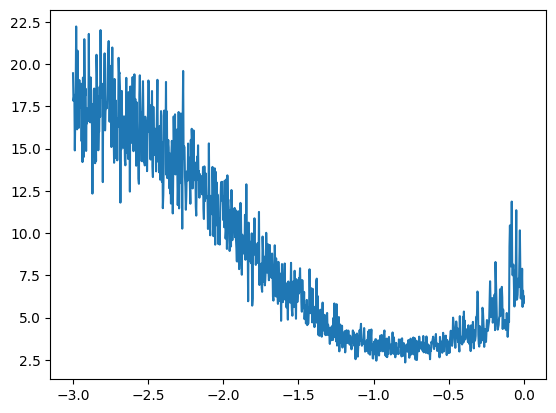

In [173]:
plt.plot(lri,lossi)

In [178]:
# now from the grap we -1 is the good setting for the learning

# applying minibactch construct

for _ in range(100000):
    
    #minibatck
    ix = torch.randint(0,X.shape[0],(32,))

    #forward pass

    emp = C[X[ix]] #32,3,2
    h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
    logits = h @ W2 + b2  # 32,27
    loss =F.cross_entropy(logits,Y[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    #update
    lr = 10 ** -1
    for p in parameters:
        p.data += -lr * p.grad
loss.item()
        




2.414163589477539

In [182]:
emp = C[X] #32,3,2
h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
logits = h @ W2 + b2  # 32,27
loss =F.cross_entropy(logits,Y) 
loss

tensor(2.2472, grad_fn=<NllLossBackward0>)

In [180]:
# learning rate decay

for _ in range(100000):
    
    #minibatck
    ix = torch.randint(0,X.shape[0],(32,))

    #forward pass

    emp = C[X[ix]] #32,3,2
    h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
    logits = h @ W2 + b2  # 32,27
    loss =F.cross_entropy(logits,Y[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    #update
    lr = 10 ** -2
    for p in parameters:
        p.data += -lr * p.grad
loss.item()
        




2.0915324687957764

In [183]:
# training set , dev/val set , test set
# 80% , 10%, 10%

In [22]:
#Building the dataset

def build_dataset(words):
    block_size = 3 # how many charcters do we take to predict next character
    X,Y = [],[]

    for w in words:
        # print(w)
        context = [0]* block_size
        for ch in w+ ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join( itos[i] for i in context),"------>" ,itos[ix])
            context = context[1:]+[ix]
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape,Y.shape)
    return X, Y


import random
random.seed(42)
random.shuffle(words)
n1 =  int(0.8 * len(words))
n2 =  int(0.9 * len(words))

Xtr,Ytr  = build_dataset(words[:n1])
Xdev,Ydev  = build_dataset(words[n1:n2])
Xte,Yte  = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [24]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [25]:
g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,100),generator=g)
b1 = torch.rand(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

sum(p.nelement() for p in parameters) # number of parameters in total

for p in parameters:
    p.requires_grad = True

In [26]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [30]:
# applying minibactch construct
lri = []
lossi = []
for i in range(30000):
    
    #minibatck
    ix = torch.randint(0,Xtr.shape[0],(32,))

    #forward pass

    emp = C[Xtr[ix]] #32,3,2
    h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
    logits = h @ W2 + b2  # 32,27
    loss =F.cross_entropy(logits,Ytr[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    #update
    # lr = lrs[i]
    lr =  0.01
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    # lri.append(lre[i])
    # lossi.append(loss.item())
loss.item()
        

2.260744571685791

In [32]:
#loss on dev test
emp = C[Xdev] #32,3,2
h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
logits = h @ W2 + b2  # 32,27
loss =F.cross_entropy(logits,Ydev) 
loss

tensor(2.3124, grad_fn=<NllLossBackward0>)

In [33]:
#loss on train test
emp = C[Xtr] #32,3,2
h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
logits = h @ W2 + b2  # 32,27
loss =F.cross_entropy(logits,Ytr) 
loss

tensor(2.3127, grad_fn=<NllLossBackward0>)

In [34]:
# loss on dev and train set are almost equal, so the model is not overfitting. The model has less parameter that's may be one reason  not to overfit
# Now work on increasing the parameters

In [60]:
g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,500),generator=g)
b1 = torch.rand(500,generator=g)
W2 = torch.randn((500,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

print(sum(p.nelement() for p in parameters)) # number of parameters in total

for p in parameters:
    p.requires_grad = True

lre = torch.linspace(-3,0,1000)
lrs = 10**lre

17081


In [74]:
# applying minibactch construct
lri = []
lossi = []
stepi  = []
for i in range(100000):
    
    #minibatck
    ix = torch.randint(0,Xtr.shape[0],(32,))

    #forward pass

    emp = C[Xtr[ix]] #32,3,2
    h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
    logits = h @ W2 + b2  # 32,27
    loss =F.cross_entropy(logits,Ytr[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    #update
    # lr = lrs[i]
    lr =  0.1
    # lr = 0.05 # decreasing the learning rate by factor of 2
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    # lri.append(lre[i])
    lossi.append(loss.item())
    stepi.append(i)
loss.item()

2.176389455795288

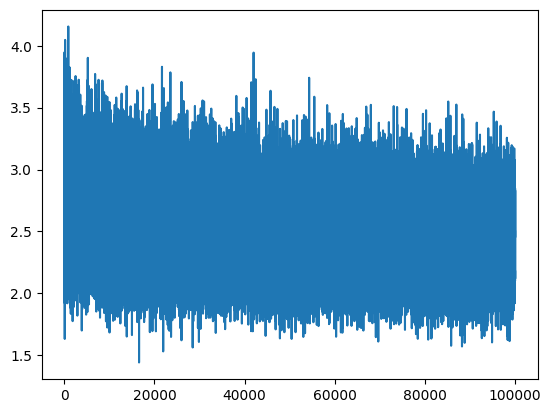

In [75]:
plt.plot(stepi,lossi)

In [76]:
#loss on dev test
emp = C[Xdev] #32,3,2
h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
logits = h @ W2 + b2  # 32,27
loss =F.cross_entropy(logits,Ydev) 
loss

tensor(2.4317, grad_fn=<NllLossBackward0>)

In [79]:
#loss on train test
emp = C[Xtr] #32,3,2
h = torch.tanh(emp.view(-1,6) @ W1 + b1) # 32,100
logits = h @ W2 + b2  # 32,27
loss =F.cross_entropy(logits,Ytr) 
loss

tensor(2.4179, grad_fn=<NllLossBackward0>)

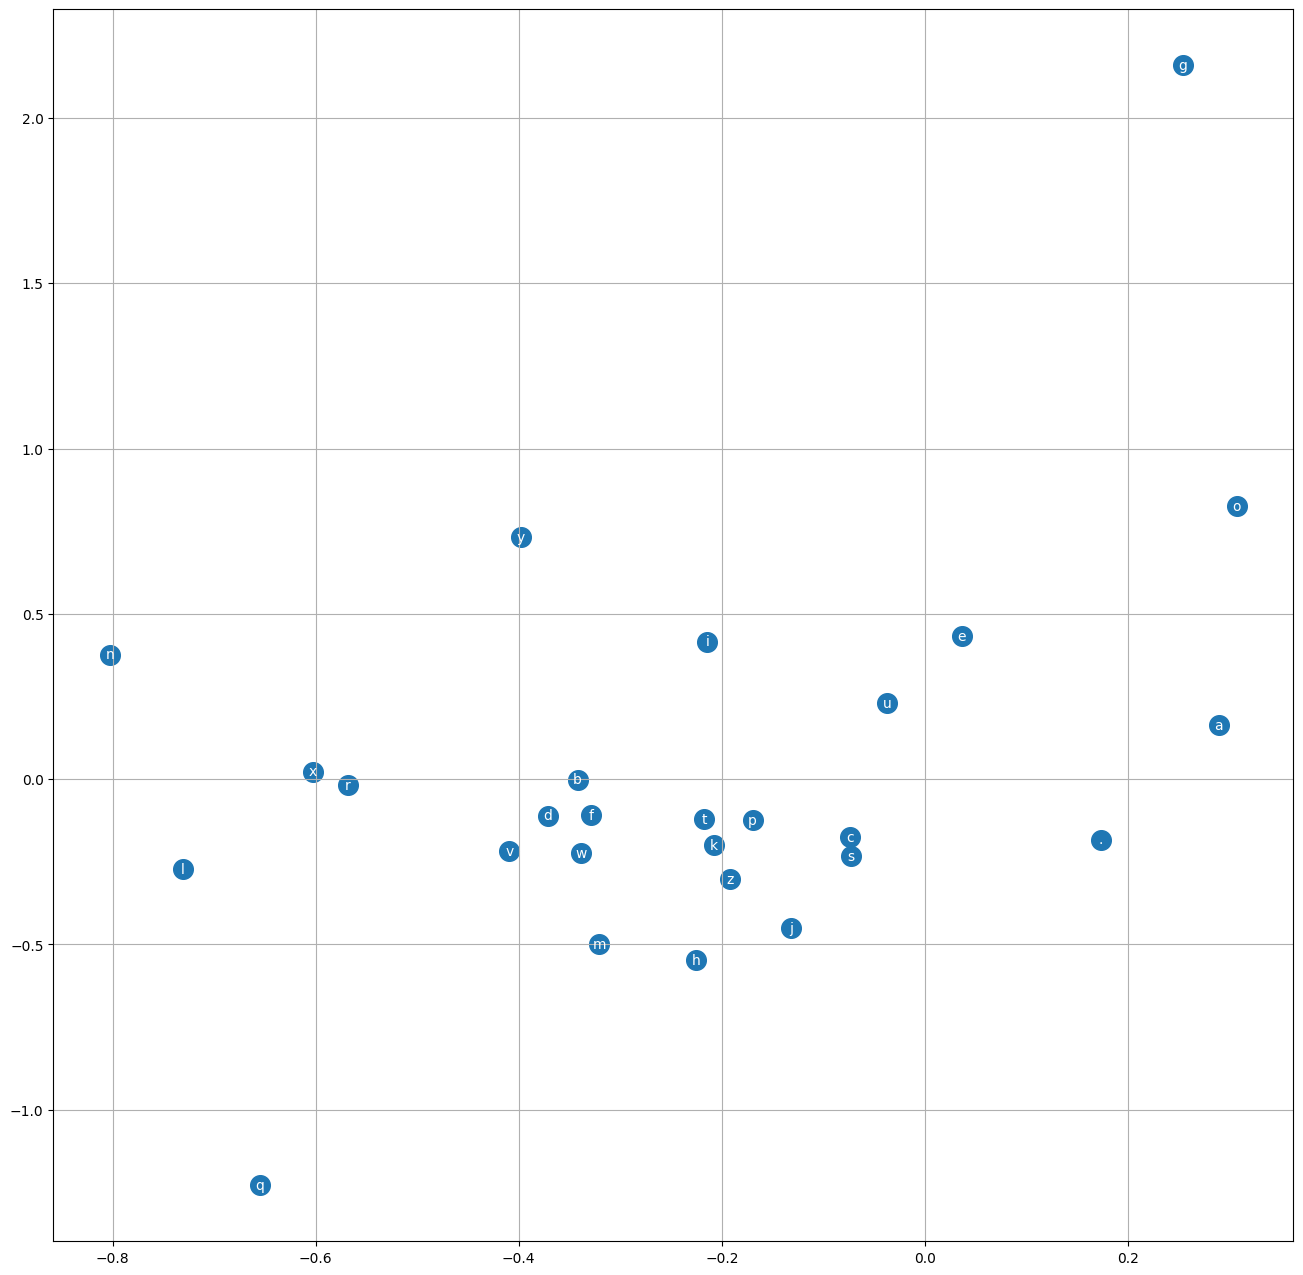

In [78]:
# now visualize the embedding of characters trained by neural network currently it's two dimensional

plt.figure(figsize=(16,16))
plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [80]:
#Now the constraints to reduce the loss is because of the embedding of C which is two dimensional and let's increase it

In [81]:
g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10),generator=g)
W1 = torch.randn((30,500),generator=g)
b1 = torch.rand(500,generator=g)
W2 = torch.randn((500,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

print(sum(p.nelement() for p in parameters)) # number of parameters in total

for p in parameters:
    p.requires_grad = True

lre = torch.linspace(-3,0,1000)
lrs = 10**lre

lri = []
lossi = []
stepi  = []

29297


In [93]:
# applying minibactch construct

for i in range(100000):
    
    #minibatck
    ix = torch.randint(0,Xtr.shape[0],(32,))

    #forward pass

    emp = C[Xtr[ix]] #32,3,2
    h = torch.tanh(emp.view(-1,30) @ W1 + b1) # 32,100
    logits = h @ W2 + b2  # 32,27
    loss =F.cross_entropy(logits,Ytr[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    #update
    # lr = lrs[i]
    # lr =  0.1
    lr = 0.01# decreasing the learning rate by factor of 2
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    # lri.append(lre[i])
    lossi.append(loss.item())
    stepi.append(i)
loss.item()

1.423020601272583

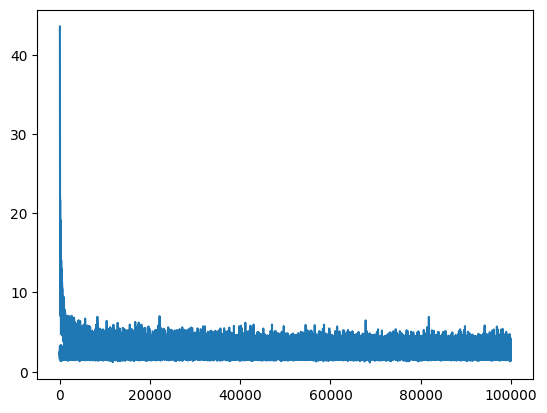

In [94]:
plt.plot(stepi,lossi)

In [95]:
#loss on dev test
emp = C[Xdev] #32,3,2
h = torch.tanh(emp.view(-1,30) @ W1 + b1) # 32,100
logits = h @ W2 + b2  # 32,27
loss =F.cross_entropy(logits,Ydev) 
loss

tensor(2.1816, grad_fn=<NllLossBackward0>)

In [96]:
#loss on train test
emp = C[Xtr] #32,3,2
h = torch.tanh(emp.view(-1,30) @ W1 + b1) # 32,100
logits = h @ W2 + b2  # 32,27
loss =F.cross_entropy(logits,Ytr) 
loss

tensor(2.0966, grad_fn=<NllLossBackward0>)

In [97]:
C.shape

torch.Size([27, 10])

In [99]:
#sample from model
block_size = 3
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0]*block_size

    while True:
        emb  = C[torch.tensor([context])] #(1,block_size,d)
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits,dim=1)
        ix = torch.multinomial(probs,num_samples=1, generator=g).item()
        context = context[1:]+[ix]
        out.append(ix)
        if ix==0:
            break
    print(''.join(itos[i] for i in out))


mona.
mayah.
see.
madhayla.
revyan.
endrari.
adee.
daeliah.
milopateden.
estanarleigh.
malaia.
nyshabergiag.
jest.
jairene.
konnie.
can.
brence.
ryyah.
fael.
yumi.


In [18]:
import wget
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [20]:
wget.download("https://raw.githubusercontent.com/karpathy/makemore/master/names.txt")

'names (1).txt'